In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("=== INFO DATASET ===")
print(df.info())

print("\n=== DESKRIPSI (SEMUA KOLOM) ===")
display(df.describe(include='all'))

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [4]:
# Konversi TotalCharges ke numerik, error jadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_pct = df.isna().mean() * 100
print("=== PERSENTASE MISSING VALUE (%) ===")
print(missing_pct)

=== PERSENTASE MISSING VALUE (%) ===
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


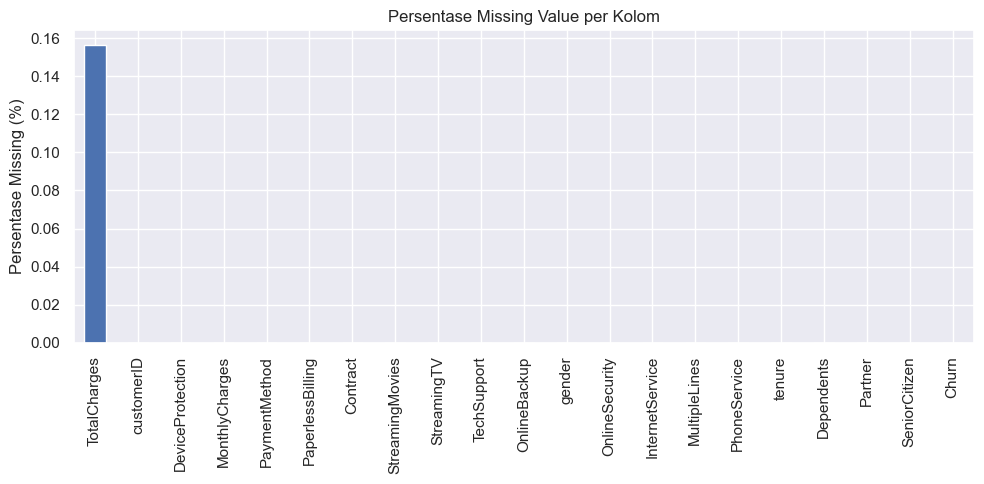

In [5]:
plt.figure(figsize=(10,5))
missing_pct.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Persentase Missing (%)")
plt.title("Persentase Missing Value per Kolom")
plt.tight_layout()
plt.show()

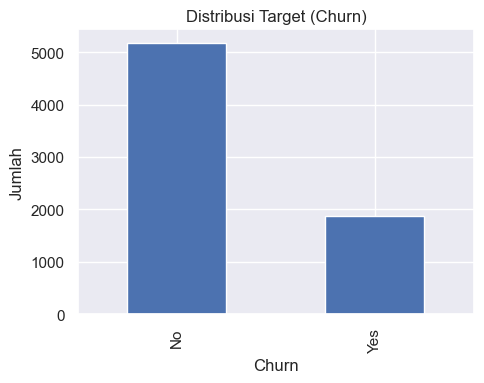


=== PERSENTASE KELAS CHURN ===
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(5,4))
df['Churn'].value_counts().plot(kind='bar')
plt.title("Distribusi Target (Churn)")
plt.xlabel("Churn")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

print("\n=== PERSENTASE KELAS CHURN ===")
print(df['Churn'].value_counts(normalize=True) * 100)

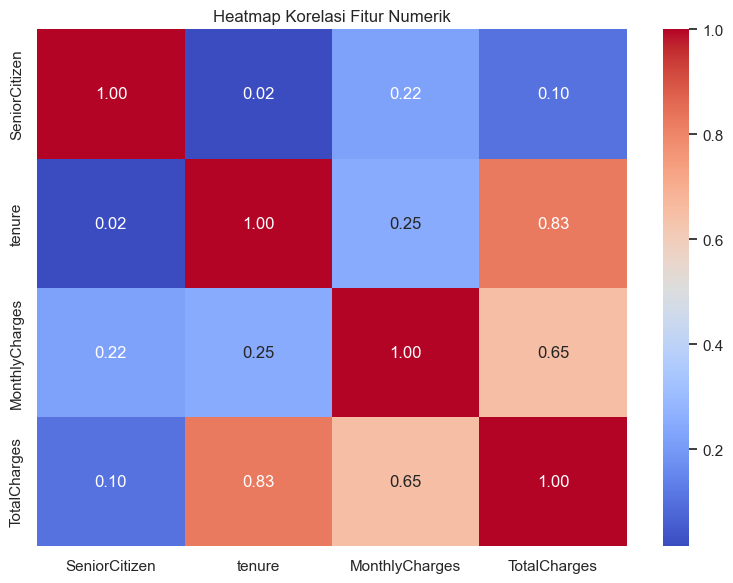

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [7]:
df_num = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,6))
corr = df_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

corr

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
# Drop baris yang TotalCharges-nya masih NaN
df_direct = df.dropna(subset=['TotalCharges']).copy()

# Fitur & target
X = df_direct.drop(columns=['Churn', 'customerID'])
y = df_direct['Churn'].map({'No': 0, 'Yes': 1})  # encode target

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
preprocess_direct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [11]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


===== Direct - Logistic Regression =====
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


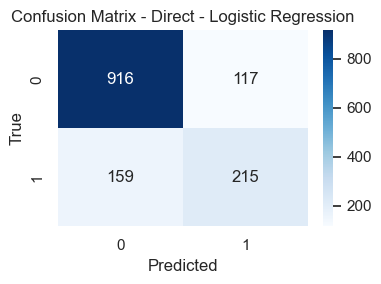

In [12]:
log_reg_direct = Pipeline(steps=[
    ('prep', preprocess_direct),
    ('model', LogisticRegression(max_iter=1000))
])

evaluate_model("Direct - Logistic Regression", log_reg_direct, X_train, X_test, y_train, y_test)


===== Direct - Random Forest =====
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



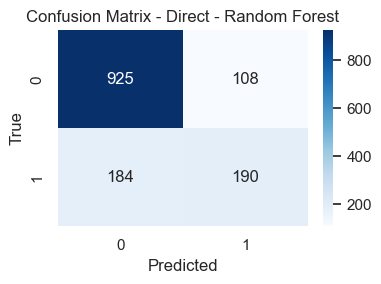

In [13]:
rf_direct = Pipeline(steps=[
    ('prep', preprocess_direct),
    ('model', RandomForestClassifier(random_state=42))
])

evaluate_model("Direct - Random Forest", rf_direct, X_train, X_test, y_train, y_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



===== Direct - Voting =====
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



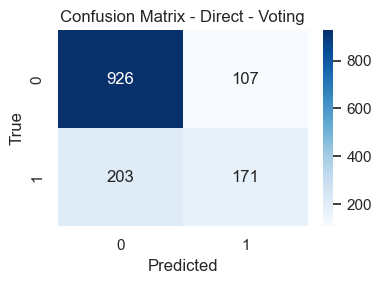

In [14]:
voting_direct = Pipeline(steps=[
    ('prep', preprocess_direct),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC(probability=True))
        ],
        voting='soft'
    ))
])

evaluate_model("Direct - Voting", voting_direct, X_train, X_test, y_train, y_test)

In [15]:
df_prep = df.copy()

In [16]:
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
df_prep['TotalCharges'] = df_prep['TotalCharges'].fillna(df_prep['TotalCharges'].median())

In [17]:
df_prep = df_prep.drop_duplicates(subset=['customerID'])

In [18]:
df_prep = df_prep.drop(columns=['customerID'])

In [19]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    q1 = df_prep[col].quantile(0.01)
    q99 = df_prep[col].quantile(0.99)
    df_prep[col] = df_prep[col].clip(q1, q99)

In [20]:
X2 = df_prep.drop(columns=['Churn'])
y2 = df_prep['Churn'].map({'No': 0, 'Yes': 1})

cat_cols2 = X2.select_dtypes(include=['object']).columns
num_cols2 = X2.select_dtypes(include=['int64','float64']).columns

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

In [21]:
preprocess_full = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols2),
        ('num', StandardScaler(), num_cols2)
    ]
)

In [23]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


===== Preprocess - Logistic Regression =====
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



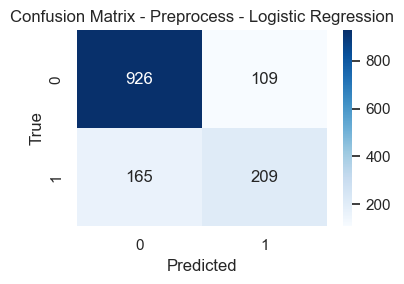

In [24]:
log_reg_prep = Pipeline(steps=[
    ('prep', preprocess_full),
    ('model', LogisticRegression(max_iter=1000))
])

evaluate_model("Preprocess - Logistic Regression", log_reg_prep, 
               X2_train, X2_test, y2_train, y2_test)


===== Preprocess - Random Forest =====
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



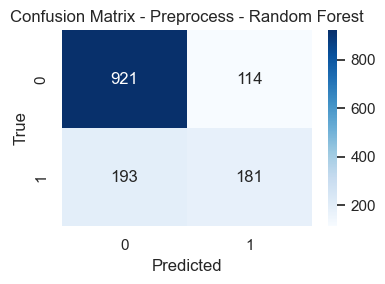

In [25]:
rf_prep = Pipeline(steps=[
    ('prep', preprocess_full),
    ('model', RandomForestClassifier(random_state=42))
])

evaluate_model("Preprocess - Random Forest", rf_prep,
               X2_train, X2_test, y2_train, y2_test)


===== Preprocess - Voting =====
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



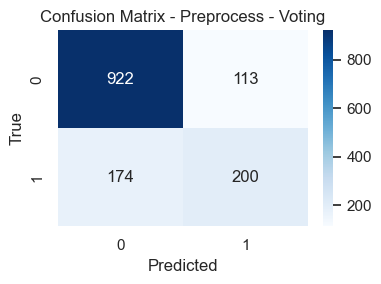

In [26]:
voting_prep = Pipeline(steps=[
    ('prep', preprocess_full),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC(probability=True))
        ],
        voting='soft'
    ))
])

evaluate_model("Preprocess - Voting", voting_prep,
               X2_train, X2_test, y2_train, y2_test)